In [1]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

## Are we sampling severity in a sensible way?

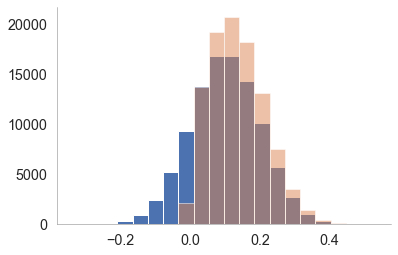

In [2]:

severity = 0.1
std_severity = 0.1

x, y = severity_sampler(n = 1e5,severity = severity, std_severity=std_severity,
                             r =0.7, seed = 0, include = True)
b = plt.hist(y[:, 0], bins = 20, normed=False)
b = plt.hist(x[:, 0], bins = b[1], normed=False, alpha = 0.5)


In [3]:
mean_truncated = predict_truncated_mean(severity, std_severity, 0, 1)
std_truncated = predict_truncated_std(severity, std_severity, 0, 1)
df = pd.DataFrame({
              "original" : {
                            "mean" : y[:, 0].mean(),
                            "std" : y[:, 0].std()
                           },
              "truncated" : {
                            "mean" : x[:, 0].mean(),
                            "std" : x[:, 0].std()
                           },
              "predicted" : {
                            "mean":  mean_truncated,
                            "std":  std_truncated
                  
                           }
             })
df["difference"] = df["original"] - df["truncated"]
# percent difference : how much the original and truncated differ
df["p_diff"] = (df["original"] - df["truncated"])/ df["original"]*100
# error : how much the original and truncated differ
df["error"] = df["predicted"] - df["truncated"]
# error : how much the original and truncated differ (percent)
df["p_err"] = (df["predicted"] - df["truncated"])/ df["predicted"]*100
# Note: we don't expect exact agreement, as we've done some correlated 
# trimming on two axes!

In [4]:
df


,original,truncated,predicted,difference,p_diff,error,p_err
mean,0.099738,0.135432,0.128760,-0.035695,-35.788416,-0.006672,-5.181816
std,0.099927,0.078576,0.079353,0.021351,21.366466,0.000776,0.978433


Text(0, 0.5, 'upper canopy severity')

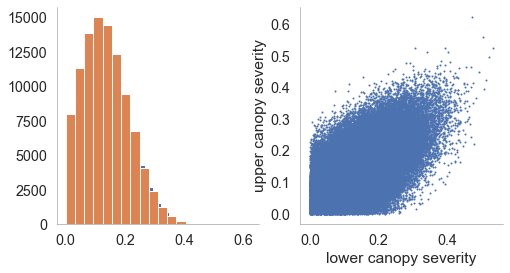

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
ax = axes[0]

ax.hist(x[:,0], 20);
ax.hist(x[:,1], 20);

ax = axes[1]
ax.scatter(x[:,0], x[:, 1],s = 1)
ax.set_xlabel("lower canopy severity")
ax.set_ylabel("upper canopy severity")

## Putting this into action

In [6]:
param = default_params()
update = {
          "alpha" : 0.04,
          "beta" : 0.5,
          "RI" : 20,
          "severity" : 0.8,
         }
param.update(update)
p = RCSR(param)

print_limits(p)
print (r"Analytic  G_u = {0:.2f} ".format(p.mean_G_u()))
print (r"Analytic  G_l = {0:.2f} ".format(p.mean_G_l()))


The minimum return interval with severity = 0.800 is 9.10 years
The maximum severity with RI = 20 years is 0.9709
Analytic  G_u = 32.69 
Analytic  G_l = 0.00 


In [7]:
p.run()

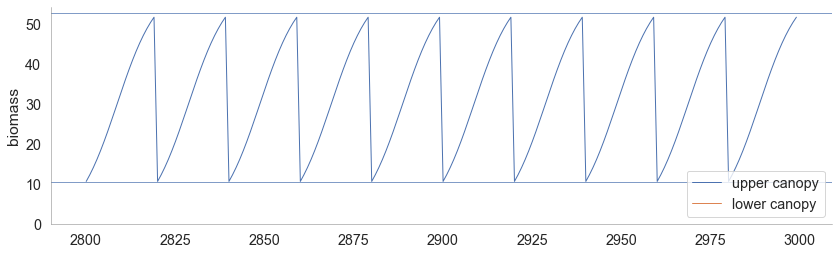

In [8]:
canopy_plot(p, nfire = 10)

In [ ]:
p = RCSR()
start = time.time()
update .update({
          "severity_type" : "random",
          "ignition_type" : "random",          
          "std_severity" : 0.05,
          "ti" : 100000,
          "tmax" : 100000,
          "dt_p" : 0.01,
          "dt" : 0.01,
         })


p = RCSR(update)
p.run()
runtime =  time.time()- start

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14,4) )
axes[0].hist(p.record.time_past_fire, 20, normed=True);
y = np.arange(2, 100)
lambda_RI = 1/p.RI
axes[0].plot(y, lambda_RI*np.exp(-lambda_RI*y), label = "RI pdf")
axes[0].set_title("Histograph of RIs")
axes[0].set_xlabel("RI")

axes[1].hist(p.record.u_severity, 20, normed=True);
axes[1].set_title("Histograph of severities")
axes[1].set_xlabel("severity")

In [ ]:
canopy_plot(p, nfire = 100)

In [ ]:
compute_errors_mean(p)[0]